# Two Dipole radiation
Simulation of two $y$ dipoles separated by a distance $d$

In [16]:
import meep as mp
from meep.materials import Al, Ag, Au, SiO2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
print(mp.__version__)

## import my colormap
import mycmapls as ms
mycmap = ms.mycmap
mycmap1 = ms.mycmap1
mycmap2 = ms.mycmap2

1.24.0


In [17]:
cell = mp.Vector3(3,3,0)
geometry = []

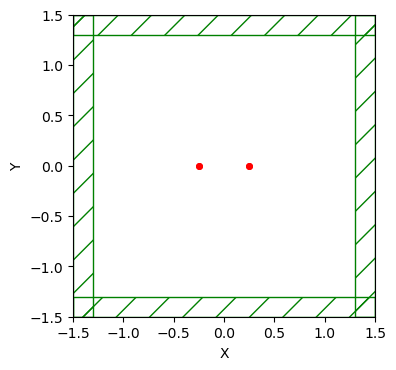

In [29]:
sources = [mp.Source(mp.ContinuousSource(frequency=2),
                     component=mp.Ey,
                     center=mp.Vector3(0.25,0.0),
                    size=mp.Vector3(0,0)),
         mp.Source(mp.ContinuousSource(frequency=2),
                     component=mp.Ex,
                     center=mp.Vector3(0.25,0.0),
                    size=mp.Vector3(0,0),
                    amplitude=0-1j),
          mp.Source(mp.ContinuousSource(frequency=2),
                     component=mp.Ey,
                     center=mp.Vector3(-0.25,0.0),
                    size=mp.Vector3(0,0)),
           mp.Source(mp.ContinuousSource(frequency=2),
                     component=mp.Ex,
                     center=mp.Vector3(-0.25,0.0),
                    size=mp.Vector3(0,0),
                    amplitude=0+1j)]
pml_layers = [mp.PML(0.2)]
resolution = 100
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000359058 s
Working in 2D dimensions.
Computational cell is 3 x 3 x 0 with resolution 100
time for set_epsilon = 0.101043 s
-----------
run 0 finished at t = 6.0 (1200 timesteps)


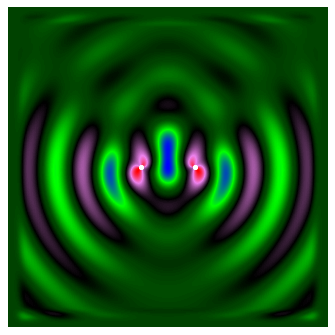

In [30]:
def modu_f(fd):
    output = np.sign(fd) * np.abs(fd) ** 1.5
    return output
sim.run(until=6)
fig = plt.figure(dpi=80)
#fig, ax = plt.subplots(dpi=300)
ax = plt.Axes(fig, [0.0, 0.0, 1, 1])
ax.set_axis_off()
fig.add_axes(ax)
#plt.figure(dpi=300)
sim.plot2D(ax=ax,fields=mp.Ey,plot_boundaries_flag=False,labels=False,
           field_parameters={'alpha':1, 'cmap':mycmap1,'post_process':modu_f}
           ,source_parameters={'alpha':1,'color':'white','linewidth':1.5,'hatch':'o'})
plt.show()

In [38]:
def modu_f(fd):
    output = np.sign(fd) * np.abs(fd) ** 0.5
    return output
    

#sim.reset_meep()
f = plt.figure(dpi=300)
#ax = plt.Axes(f, [0.0, 0.0, 1, 1])
#ax.set_axis_off()
#fig.add_axes(ax)
#plt.axis('off')
Animate = mp.Animate2D(sim,plot_boundaries_flag=False,
                       fields=mp.Ey, f=f, realtime=False, normalize=True,field_parameters={'post_process':modu_f,'alpha':1, 'cmap':mycmap}
                      ,source_parameters={'alpha':1,'color':'white','linewidth':0.5,'hatch':'o'})
plt.close()

In [39]:
sim.run(mp.at_every(0.02,Animate),until=1-0.02)
plt.close()

on time step 1592 (time=7.96), 1.17382 s/step
Normalizing field data...
run 3 finished at t = 8.945 (1789 timesteps)


In [40]:
gifname = "2_dr_untrim.gif"
Animate.to_gif(6,gifname)
! convert 2_dr_untrim.gif -crop 600x600+623+299  +repage 2_dr.gif 

Generating GIF...


## Two Dipole Radiation
![2_dr](./2_dr.gif )